# Exploratory Data Analysis Project 
# Indian Startup Funding (2015-17)

## *Name : Kishor Goswami*

#### About this Project:
This project is based on the dataset which has funding information of the Indian startups from January 2015 to August 2017. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).

This analysis could be used to further dweleve into useful insights using Funding variations based upon the oil price changes, government changes and other variable like demonitization, etc.



### Impoting libraries 

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as show
import seaborn as sns
import squarify
%matplotlib inline

### Reading and making dataframe of the csv formated file
Here we converted categorical data to 'category' type


csv file-(startup_funding.csv)- contains the information of all startups(india) from 2015 to 2017


In [8]:
df=pd.read_csv('startup_funding.csv',dtype={
    
    'InvestmentType':'category'
    
})#read_csv to import dataset 'startup_funding.csv'



## sample of my dataset (startup_funding.csv)



In [9]:
df.head(4)#display first 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN


In [10]:
df.tail(4)#display first 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


### metadata


columns and index information

In [11]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SNo               2372 non-null   int64   
 1   Date              2372 non-null   object  
 2   StartupName       2372 non-null   object  
 3   IndustryVertical  2201 non-null   object  
 4   SubVertical       1436 non-null   object  
 5   CityLocation      2193 non-null   object  
 6   InvestorsName     2364 non-null   object  
 7   InvestmentType    2371 non-null   category
 8   AmountInUSD       1525 non-null   object  
 9   Remarks           419 non-null    object  
dtypes: category(1), int64(1), object(8)
memory usage: 169.6+ KB


C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


dimentions of dataframe


In [12]:
print('Rows {rows} and Columns {columns}'.format(rows=df.shape[0],columns=df.shape[1]))

Rows 2372 and Columns 10


# Cleaning Data

### Problem 

Dataset dosen't have proper format


In [13]:
df.dtypes

SNo                    int64
Date                  object
StartupName           object
IndustryVertical      object
SubVertical           object
CityLocation          object
InvestorsName         object
InvestmentType      category
AmountInUSD           object
Remarks               object
dtype: object

## repersentation of missing data

- here yellow bars repersent the null values(missing values)
- since we can see that 'remarks' has the higher density of missing data,we can neglect this column
- here we can use estimated statistical values of available data of attribute('AmountInUSD') to fill the missing values



## dataframe contains lots of NaN(null values)

In [14]:
df.apply(lambda X:sum(X.isnull()))

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

<AxesSubplot:>

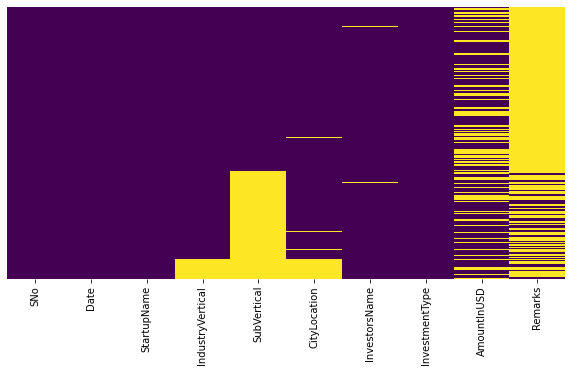

In [15]:

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

### specifying format error

some dates are not formated where generalized format is 'dd/mm/yy'


In [16]:
df[df['Date']=='12/05.2015']['Date']#here '.' is there instead of '/'


2103    12/05.2015
2104    12/05.2015
Name: Date, dtype: object

## Amount in usd has ','(notnumeric) chracters and null values
datatype is not numerical

In [17]:
df['AmountInUSD'].head(5)

0    1,300,000
1          NaN
2          NaN
3      500,000
4      850,000
Name: AmountInUSD, dtype: object

# solving problem with missing data
- WE CAN FILL THE MISSING NUMERICAL VALUES USING FOLLWING STATISTICAL METHODS-
    -BY MODE OF CENTRAL TENDENCY
    
        - BACKWARD FILLING
    
        -FORWARD FILLING
    
        -INTERPOLATION(LINEAR)
    

## Cleaning missing data and formatting


### handeling cities null in column

In [18]:
df['CityLocation']=df['CityLocation'].fillna(value='NotSpecific')

In [245]:
df['IndustryVertical']=df['IndustryVertical'].fillna(value='Other')

### Formatting citylocation 

In [19]:
import re#importing regular expressions
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()
    if   re.search('/',x):
        return x.split('/')[0].strip()
    else :
        return x.strip()
df['CityLocation']=df['CityLocation'].apply(convert_Slash)

## Backup of dataframe
deleting unwanted columns

In [20]:
newdf=df.copy()
del newdf['Remarks']
del newdf['SNo']


### Investmenttype column has repeated values of categories
#### categories have alphabetical error
this column has unformatted categories which results in repetition error(spaces between words)

here -Seed Funding and SeedFunding are same 




In [21]:
newdf['InvestmentType'].value_counts().index


CategoricalIndex(['Seed Funding', 'Private Equity', 'SeedFunding',
                  'Crowd Funding', 'Crowd funding', 'Debt Funding',
                  'PrivateEquity'],
                 categories=['Crowd Funding', 'Crowd funding', 'Debt Funding', 'Private Equity', 'PrivateEquity', 'Seed Funding', 'SeedFunding'], ordered=False, dtype='category')

In [22]:
newdf['InvestmentType']=newdf['InvestmentType'].apply(lambda x:x.replace(' ','').lower())

## Fomatting dates to time series

In [23]:
def rem_err_date(x):#function checks for error in format of date column in funding dataframe
    if re.search('.',x):
        return x.replace('.','')
    return x
newdf['Date']=newdf['Date'].apply(rem_err_date)
newdf['Date'].replace('12/052015','12/05/2015',inplace=True)
newdf['Date'].replace('15/012015','15/01/2015',inplace=True)
newdf['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdf['Date'].replace('13/042015','13/04/2015',inplace=True)
newdf['Date']=pd.to_datetime(newdf['Date'],format='%d/%m/%Y')

In [24]:
newdf.dtypes['Date']

dtype('<M8[ns]')

## calculating number of investors for each startup
   - as various startups have multiple number of investors arrange according to the number of investors for a particular startup(startup name)

In [25]:
def calculate_n_investors(x):
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdf['numberofinvestors']=newdf['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)

### most multiple investors for  individual startup

In [26]:
n_inv=newdf.loc[:,['StartupName','InvestorsName','numberofinvestors']].sort_values('numberofinvestors',ascending=False)

### visualizing the number of investors per startup


* visualizing the top 10 as per number of investors
* here maximum number of investors per startup is 10


In [27]:
n_inv.head(10)

,StartupName,InvestorsName,numberofinvestors
1338,MyChild App,"Samir Bangara, Anisha Mittal, Amit Gupta, Pall...",10
348,Innov8,"Vijay Shekhar Sharma, Rajan Anandan, Kunal Sha...",10
1377,Zapr,"Flipkart, Saavn, Micromax, Dhiraj Rajaram, Amb...",9
473,GoComet,"India Quotient, Rajul Garg, Rajesh Yabaji, Cha...",8
568,Hubilo,"Girish Mathrubootham, VC Karthic, Miten Mehta,...",8
1617,Indifi,"Accel Partners, Elevar Equity, Pramod Bhasin, ...",8
1219,HashLearn,"Bhavish Aggarwal, Binny Bansal, Rajan Anandan...",8
2197,Dazo,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",8
701,infeedo,"Dheeraj Jain, Palash Jain, Anupam Mittal, Amee...",8
1043,Parentlane,"Sujeet Kumar, Aprameya, Sumit Jain, Subramanya...",8


- single funded startups are most
- there are least number of startups having 9 investors

<AxesSubplot:xlabel='numberofinvestors', ylabel='count'>

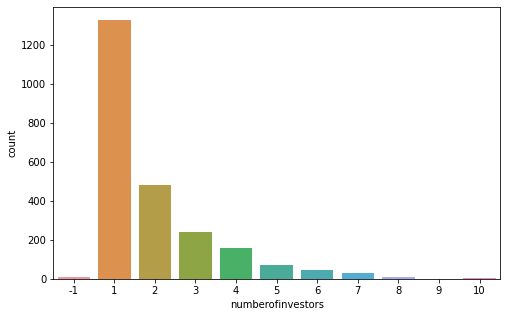

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='numberofinvestors',data=n_inv)


### FILLING MISSING VALUES IN  AmountInUSD

AmountinUSD column is formatted to integer 

In [29]:
def convert_AmountInUSD(x):
    if re.search(',',x):
        return (x.replace(',',''))
    return x
newdf['AmountInUSD']=newdf[newdf['AmountInUSD'].notnull()]['AmountInUSD'].apply(convert_AmountInUSD).astype('int')

In [30]:
newdf['AmountInUSD']=round(newdf['AmountInUSD'].fillna(np.mean(newdf['AmountInUSD'])))
newdf['AmountInUSD']=newdf['AmountInUSD'].astype('int')

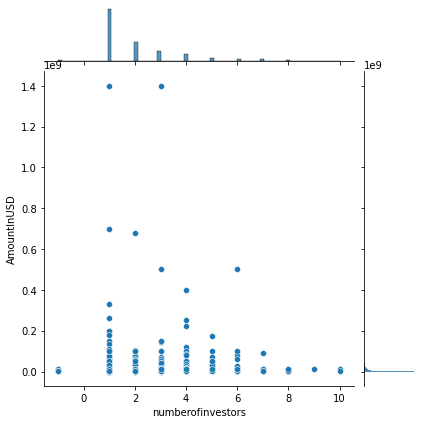

In [32]:
sns.jointplot(x='numberofinvestors',y='AmountInUSD',data=newdf)

### FILLING MISSING VALUES IN  InvestmentType

In [33]:
newdf['InvestmentType'].fillna(method='bfill',inplace=True)#backward filling of null values

### Analysis of data after cleaning
 - here yellow bars represent the Missing data(NULL values)
 

<AxesSubplot:>

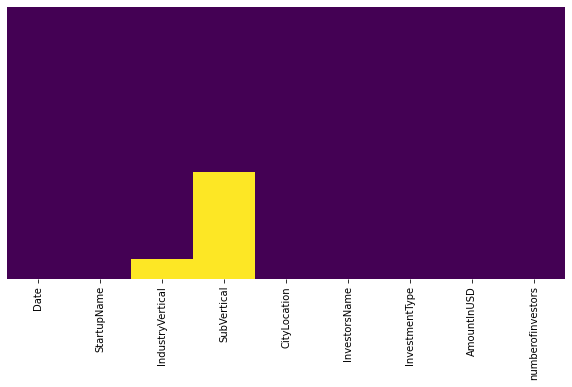

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(newdf.isnull(),cmap='viridis',yticklabels=False,cbar=False)


# Indepth Analytics


In [35]:
newdf.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,bangalore,Kae Capital,privateequity,1300000,1
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,privateequity,12031073,1
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2


### Startups are only be initiate success by funding.
### Here we can see that best way to classify is to check the amount of funding and 
### the City Date is a time series which can show desired insights according to frequency

- funding of startups are highly dispersed and shown as investors are highly specific about startups


In [36]:
show(newdf.describe()['AmountInUSD'].astype(int))



,AmountInUSD
count,2372
mean,12031073
std,51335545
min,16000
25%,700000
50%,7300000
75%,12031073
max,1400000000


how many unique startups are introduced in year between 2015-2017?
- 2001 startups

In [37]:
newdf['StartupName'].nunique()

2001

# top 10 startups had most funding
paytm and flipkart were on the top of the run


In [38]:
tp10fund=show(newdf.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False))
tp10fund.head(10)



,AmountInUSD
StartupName,
Paytm,2.164062e+09
Flipkart,1.559700e+09
Ola,9.845000e+08
Snapdeal,7.000000e+08
Flipkart.com,7.000000e+08
Ola Cabs,5.270311e+08
Olacabs,4.000000e+08
Oyo Rooms,3.500000e+08
Quikr,2.300000e+08


#### DETAILS OF TOP 10 STARTUPS AS PER THE FUND GENERATED
   - below is the details about the top 10 startups on different Dates

In [42]:
#details of top 10 funded startups
def find(x):
    if x in tp10fund.head(10).index:
        return True
    return False

n=newdf[newdf['StartupName'].apply(find)]


 # which kind of investment did the top10 investors got
 
 - The top 10 investments were pivate equtiy and hence seed funding is nill
 
AS THE TOP 10 FUNDNDING AMOUNT ARE RECEIVED THROUGH PRIVATE EQUITY SO SORTING THE TOP 10 STARTUPS AS PER PRIVATE EQUITY
BELOW THE PRIVATE EQUITY COLUMN REPRESENTS THE COUNT OF INVESTMENT TYPE

In [43]:
pd.crosstab(n['StartupName'],columns=n['InvestmentType']).sort_values(by='privateequity',ascending=False)

InvestmentType,privateequity
StartupName,
Paytm,5
Flipkart,4
Ola,4
Ola Cabs,4
Delhivery,3
Quikr,3
Oyo Rooms,2
Snapdeal,2
Flipkart.com,1


## Insights regarding the best startup in terms of funding amount 

In [44]:
newdf[newdf['StartupName']=='Paytm']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,bangalore,SoftBank Group,privateequity,1400000000,1
821,2016-08-30,Paytm,eCommerce,Mobile Wallet & ECommerce platform,bangalore,MediaTek Inc.,privateequity,60000000,1
1787,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,new delhi,"Alibaba Group, Ant Financial",privateequity,680000000,2
2218,2015-03-13,Paytm,NaN,NaN,notspecific,Ratan Tata,privateequity,12031073,1
2276,2015-02-05,Paytm,NaN,NaN,notspecific,Ant Financial Services (Alipay),privateequity,12031073,1


### companies with most number of investors
here we can see that companies which have more number of investors are not proportionate to funding amount

In [45]:

cmi=show(newdf.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending=False))
cmi.head(10)

,numberofinvestors
StartupName,
Swiggy,7
UrbanClap,6
Jugnoo,5
NoBroker,5
Medinfi,5
Paytm,5
Niki.ai,4
Capital Float,4
Flipkart,4


#### below are the insights for number of inverstors to a particular start up 

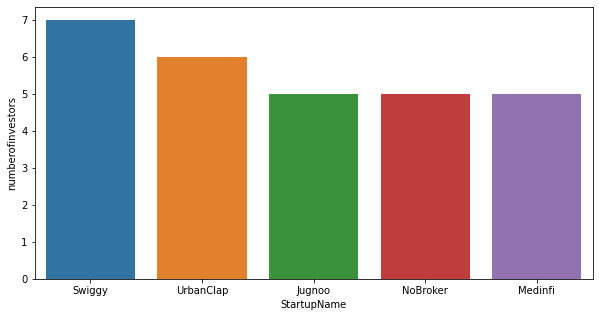

In [46]:
fig=plt.figure(figsize=(10,5))
sns.barplot(y='numberofinvestors',x='StartupName',data=cmi.reset_index().head())
plt.show()

#### Here we can see that kernel density of startups having two and three number of investors is high 

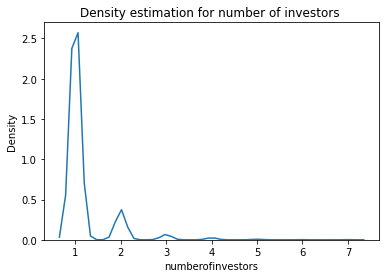

In [47]:
sns.kdeplot(data=cmi.reset_index()['numberofinvestors'],gridsize=50,)#most are  2 or 3 in number
plt.title('Density estimation for number of investors ')
plt.show()

### Is funding depends upon number of investors
- here we can see that there is no relation between funding amount and number of investors

<AxesSubplot:>

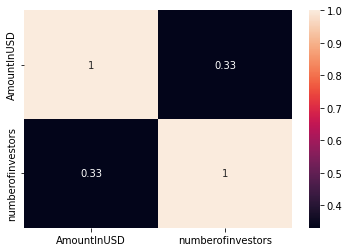

In [48]:
top10=tp10fund.join(cmi)
sns.heatmap(top10.corr(),annot=True)

### Investors  

In [49]:
investor=newdf[newdf['InvestorsName'].notnull()]['InvestorsName']
arr=np.array([])
for i in investor:
    for j in i.split(','):
        arr=np.append(arr,j.lower().strip())
        


### what are the total number of unique investors

In [50]:

show(arr)[0].nunique()

2499

In [51]:
#investors with most funding
sh=show(arr)[0].unique()

### investors with most funding frequency

In [52]:
cinvestors=show(arr)[0].value_counts()[1:]
cinvestors.head(10)

sequoia capital         64
accel partners          53
kalaari capital         44
saif partners           43
indian angel network    41
blume ventures          40
                        38
ratan tata              30
rajan anandan           25
tiger global            25
Name: 0, dtype: int64

Top Investors 


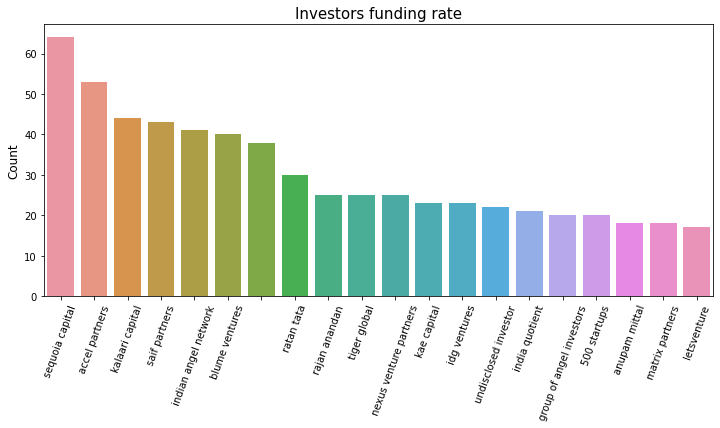

In [53]:
print("Top Investors ")
plt.figure(figsize = (12,5))
bar= sns.barplot(x=cinvestors.index[:20],y=cinvestors.values[:20])
bar.set_xticklabels(bar.get_xticklabels(),rotation=70)
bar.set_title("Investors funding rate", fontsize=15)
bar.set_xlabel("", fontsize=12)
bar.set_ylabel("Count", fontsize=12)
plt.show()

### Top 10 Investors with higher funding amount

In [56]:
show(newdf.groupby('InvestorsName').sum()['AmountInUSD'].sort_values(ascending=False)).head(10)#top investors



,AmountInUSD
InvestorsName,
SoftBank Group,1462000000
"Microsoft, eBay, Tencent Holdings",1400000000
Steadview Capital and existing investors,700000000
"Alibaba Group, Ant Financial",680000000
"Baillie Gifford, Falcon Edge Capital, Tiger Global, SoftBank Group, DST Global, Didi Kuaidi",500000000
"Alibaba, Foxconn, Softbank",500000000
"DST Global, Steadview Capital, Tiger Global, Accel Partners & Others",400000000
SoftBank Group Corp,330000000
Ratan Tata,288745752


### paring of amount and  number of investors :
- here we can see that most funding is generated through privateequity ( in terms of amount )
- most of the startups have seed funding (in terms of funding frequency )

### Total amount of funding recieved as per investment type 

In [57]:
newdf.groupby('InvestmentType').sum()['AmountInUSD']


InvestmentType
crowdfunding     1.557680e+05
debtfunding      7.800000e+06
privateequity    2.088251e+10
seedfunding      7.647238e+09
Name: AmountInUSD, dtype: float64

### Total number of funding recieved as per investment type 

In [58]:
newdf['InvestmentType'].value_counts()



seedfunding      1302
privateequity    1067
crowdfunding        2
debtfunding         1
Name: InvestmentType, dtype: int64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


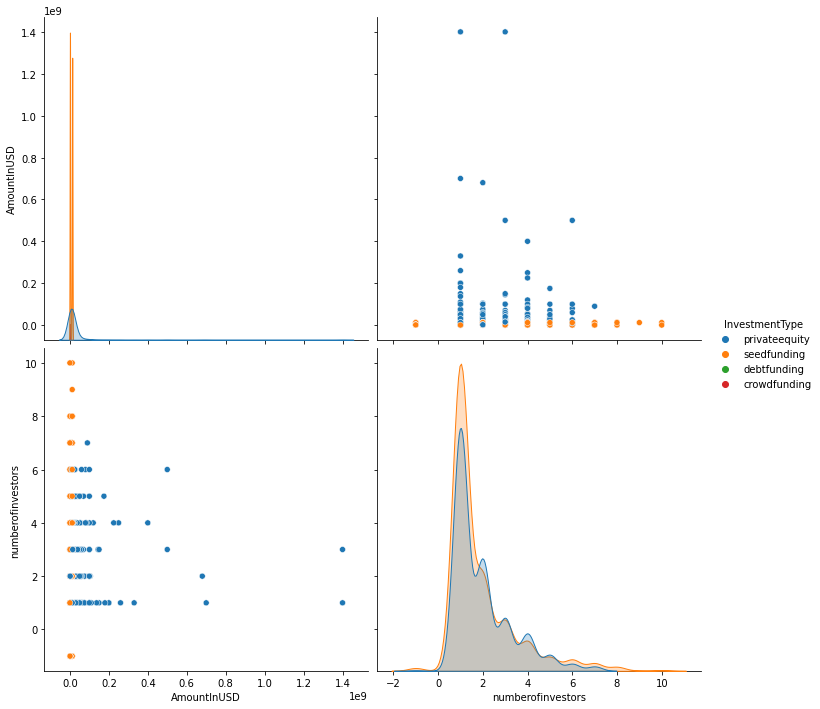

In [59]:
sns.pairplot(newdf,hue='InvestmentType',size=5)

# Top 10 industry sectors with most funding


### visualization of the growth rate of each sector (industry vertical)
- Here we can see that consumer internet sector has more funding (as per amount)
- here we can see that consumer internet sector has most frequency
- it also seen that debt funding and crowd funding are negligible as compared to other Investment types


In [283]:
# converting all industry vertical entries to lower to avoid category duplication
newdf['IndustryVertical']=newdf['IndustryVertical'].apply(lambda x:x.lower())


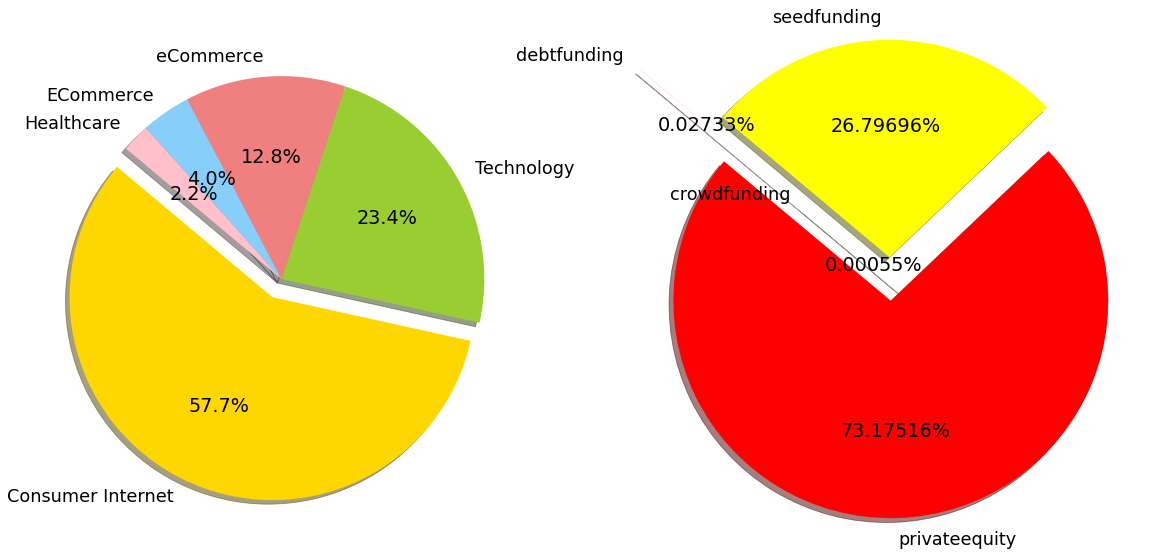

In [82]:
#in which sector there are most startups
d=newdf['IndustryVertical'].value_counts().head(5)
f=newdf.groupby('InvestmentType').sum()['AmountInUSD']
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
labels=[d.index,f.index]
size=[d.values,f.values]
colors = [['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink'],['green','pink','red','yellow']]
plt.axis('equal')
explode = ((0.1, 0, 0, 0,0),(-0.5,0.5,0.1,0.1))
ax[0].pie(size[0],explode=explode[0], labels=labels[0], colors=colors[0],
        autopct='%1.1f%%', shadow=True, startangle=140)

ax[1].pie(size[1],explode=explode[1], labels=labels[1], colors=colors[1],autopct='%1.5f%%', shadow=True, startangle=140)
plt.show()

In [285]:
plt.figure(figsize=(14,5))
iv=newdf['IndustryVertical'].value_counts().head(10)
iv.plot.bar()

plt.title('Frequency Startups Domain')
plt.show()

# Most preferrable cities as per Investment on startups
- insights provided shows that Banglore has the most average funding Amount


Text(0.5, 1.0, 'Distribution of Startups across Top cities')

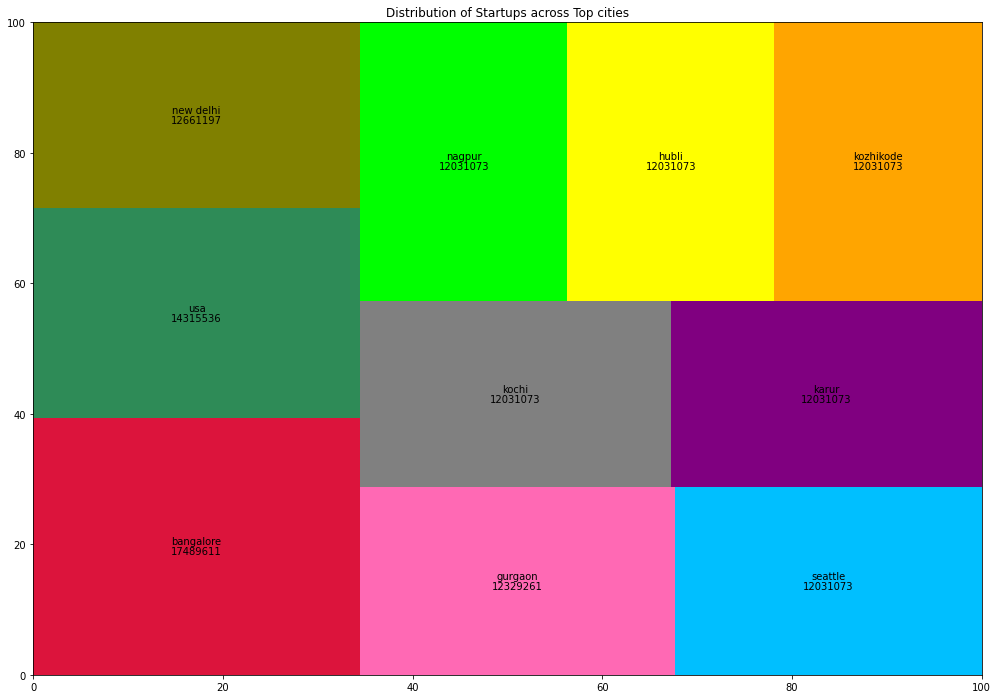

In [60]:
plt.figure(figsize=(17,12))
mean_amount = newdf.groupby('CityLocation').mean()["AmountInUSD"].astype('int').sort_values(ascending=False).iloc[1:].head(10)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values,color=['crimson','seagreen','olive','hotpink','deepskyblue','grey','purple','lime','yellow','orange'])
plt.title('Distribution of Startups across Top cities')

###  here we can see that Ahmedabad is a Market place for dept-funding


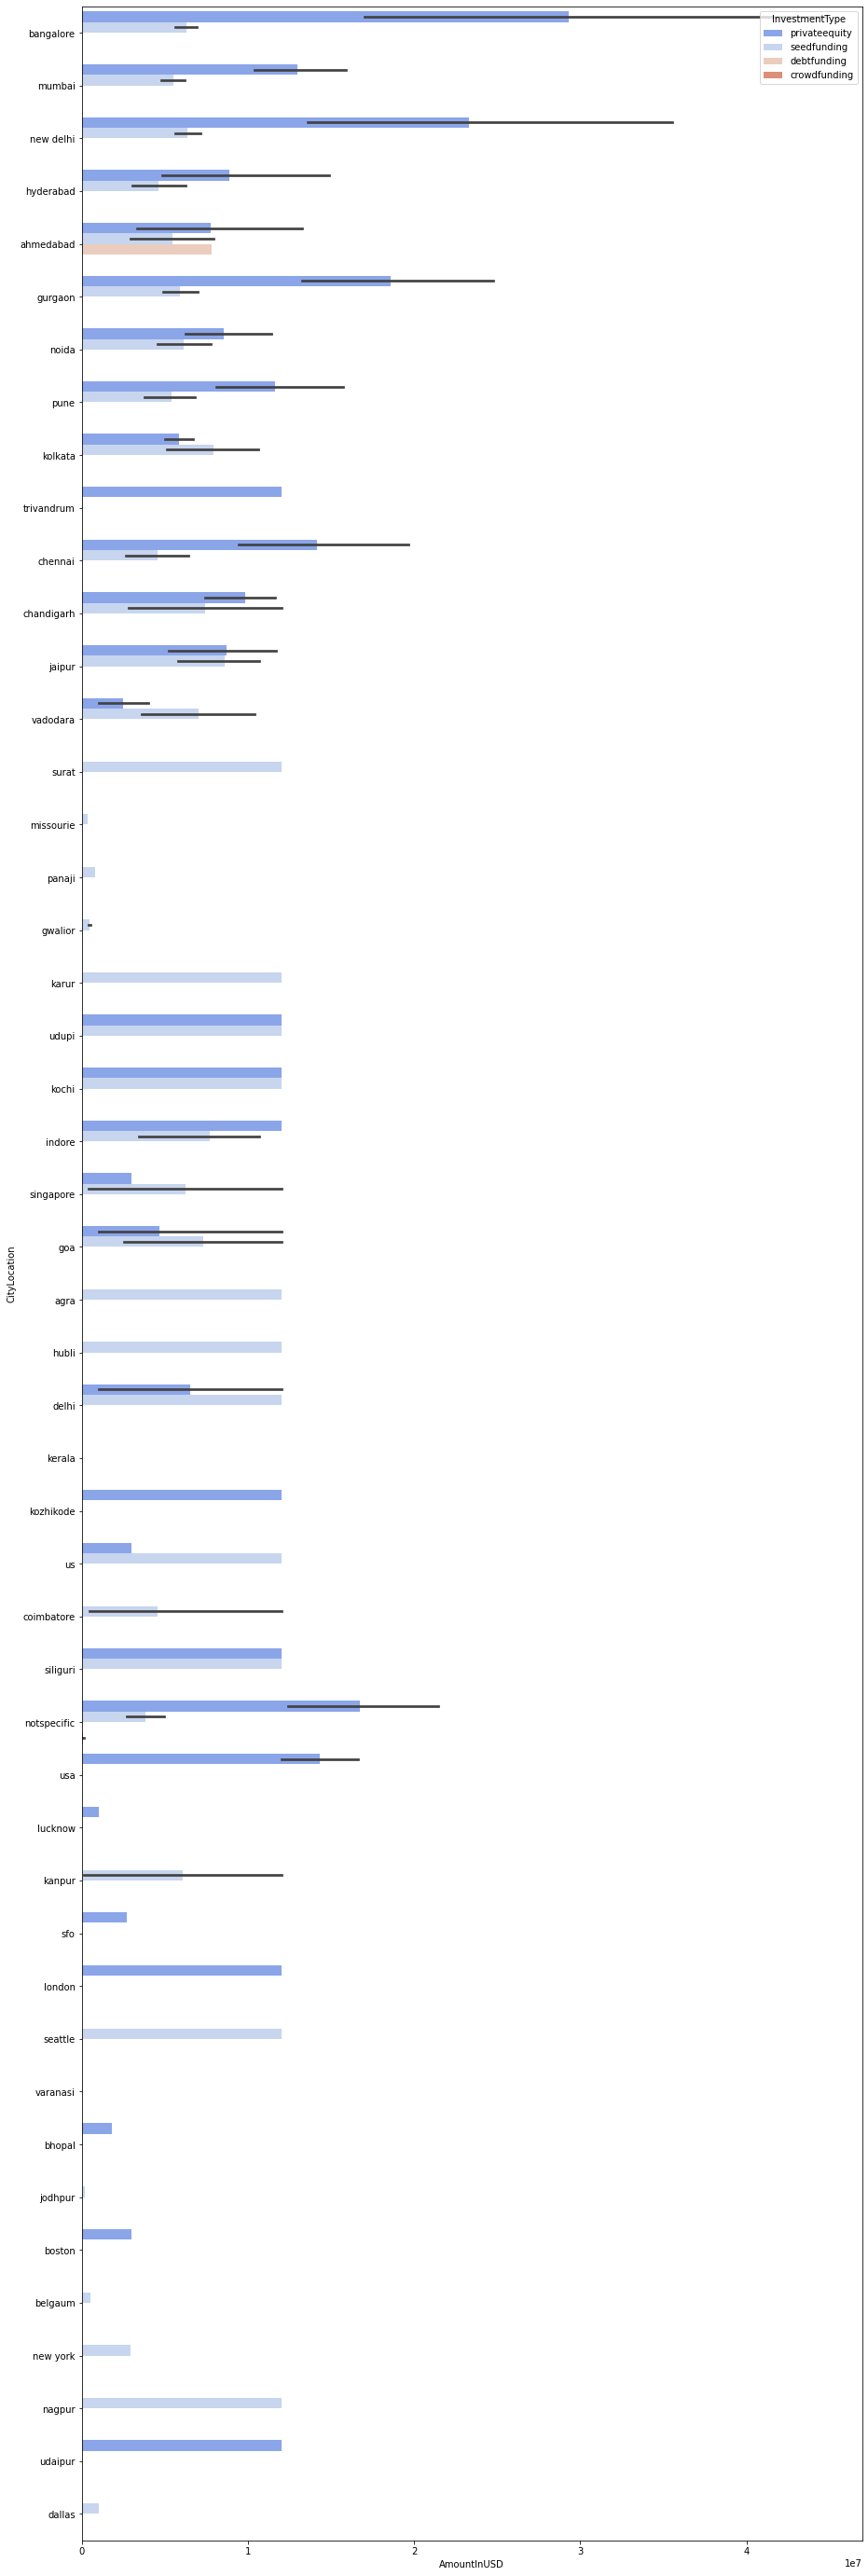

In [61]:
fig=plt.figure(figsize=(15,50))

sns.barplot(y='CityLocation',x='AmountInUSD',data=newdf[newdf['CityLocation']!='india'],estimator=np.mean,hue='InvestmentType',palette='coolwarm')

#average investment in banglore is most
plt.show()
#amehdabad is the market place for dept funding


## Time Series Analysis

In [62]:
dnewdf=newdf.set_index('Date')
dnewdf.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
Date,,,,,,,,
2017-08-01,TouchKin,Technology,Predictive Care Platform,bangalore,Kae Capital,privateequity,1300000,1
2017-08-02,Ethinos,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,privateequity,12031073,1
2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2


### total funding in 2017 



In [64]:
dnewdf['2017']['AmountInUSD'].sum()

C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/2821900585.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dnewdf['2017']['AmountInUSD'].sum()


7747185034

### total funding in 2016

In [65]:

dnewdf['2016']['AmountInUSD'].sum()


C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/663254055.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dnewdf['2016']['AmountInUSD'].sum()


8724735319

### total funding in 2015

In [66]:


dnewdf['2015']['AmountInUSD'].sum()

C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/1688995072.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dnewdf['2015']['AmountInUSD'].sum()


12065784954

### total funding was most in 2015 and decreased

<AxesSubplot:title={'center':'total funding amount'}, xlabel='Date'>

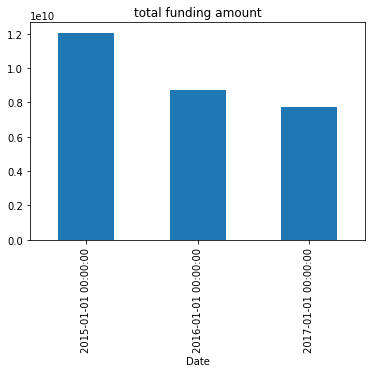

In [67]:

plt.title('total funding amount')
dnewdf.resample('AS')['AmountInUSD'].sum().plot.bar()


### Plotting Average Year-Start-wise graph for investment in period between January-2015 to Jan-2017 (Annual Starting)



Text(0.5, 1.0, 'average funding amount')

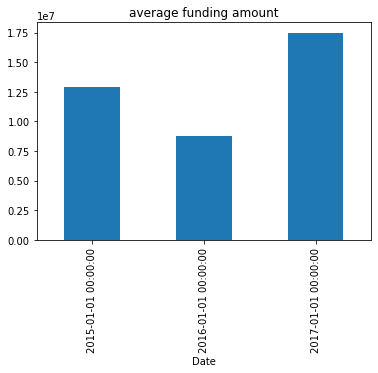

In [68]:
q=dnewdf['AmountInUSD'].resample('AS').mean()
q.plot(kind='bar')
plt.title('average funding amount')


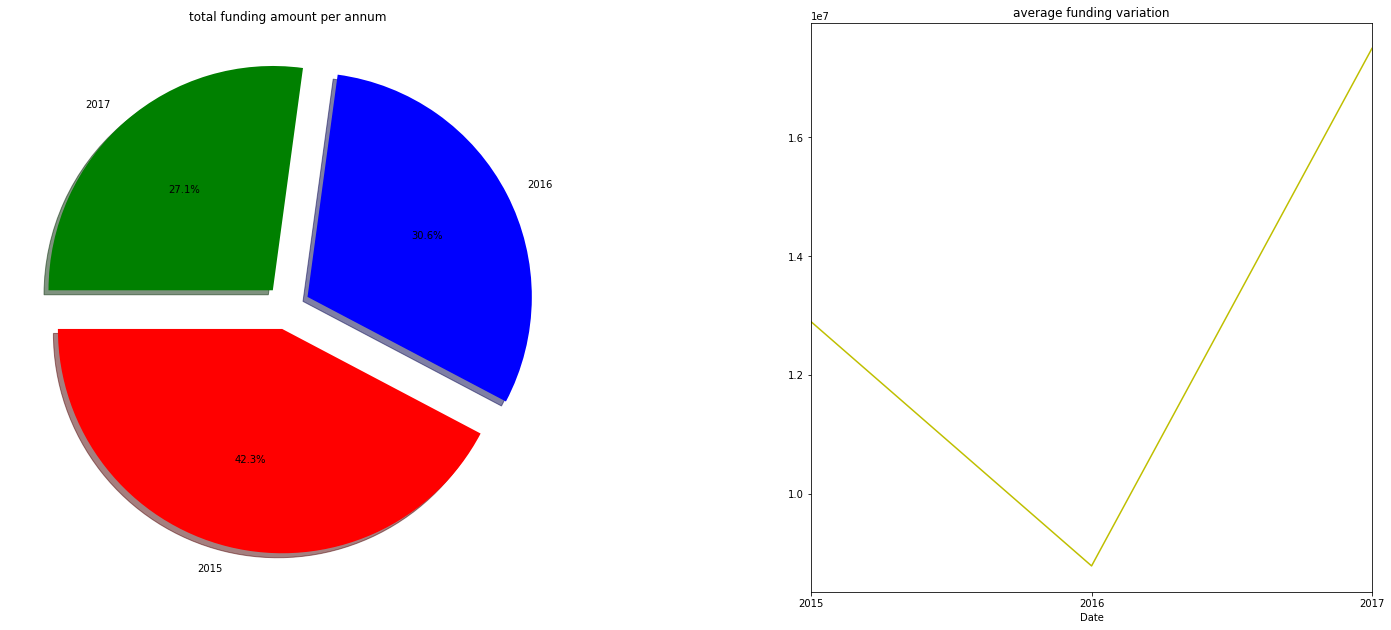

In [69]:
a=dnewdf['AmountInUSD'].resample('AS').sum()
fig,ax=plt.subplots(nrows=1,ncols=2)

fig.tight_layout(pad=3) # Or equivalently,  "plt.tight_layout()"
fig.set_figheight(11)
fig.set_figwidth(24)

explode = (0.1, 0.1, 0.1)
ax[0].pie(a,autopct='%1.1f%%',shadow=True,startangle=180,explode=explode,colors=['red','blue','green'],labels=['2015','2016','2017'])
ax[0].set_title('total funding amount per annum')

q.plot(color='y',ax=ax[1])
ax[1].set_title('average funding variation')
plt.show()


### Total variation of funding amount per month in period of 2015-2017

In [81]:
newdf['year']=newdf['Date'].dt.year
newdf['month']=newdf['Date'].dt.month

### Insights of 2015
- below we can visualize that total funding reached to its peak between the months of june - july and Aug - Sep
- End week of july was most attracted to investments
- Quarter 3 was seen as the most funded quarter of 2015

C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/2197641171.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a=dnewdf['2015'].resample('MS').sum()['AmountInUSD'].plot()
C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/2197641171.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a2=sns.barplot(data=dnewdf['2015'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/2197641171.py:17: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[str

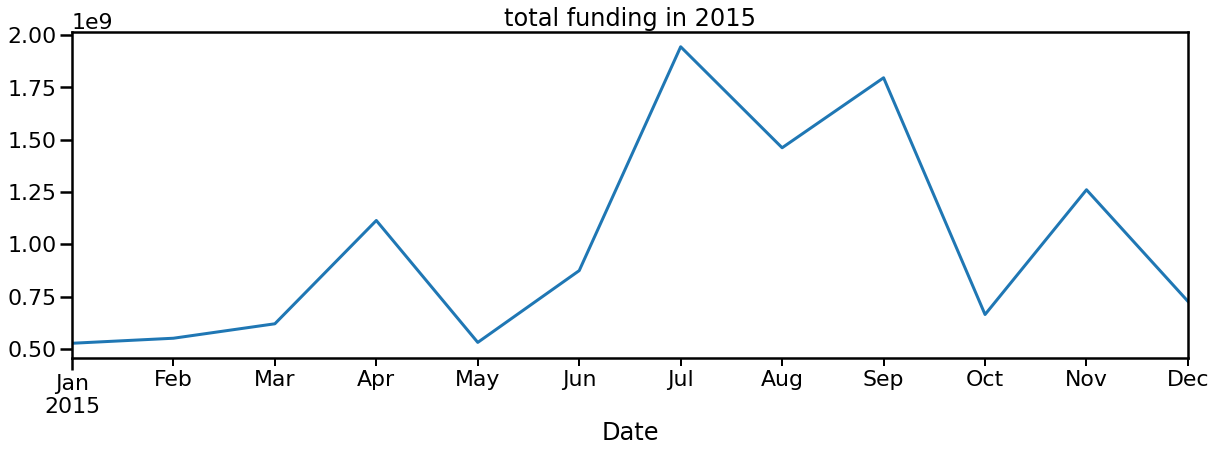

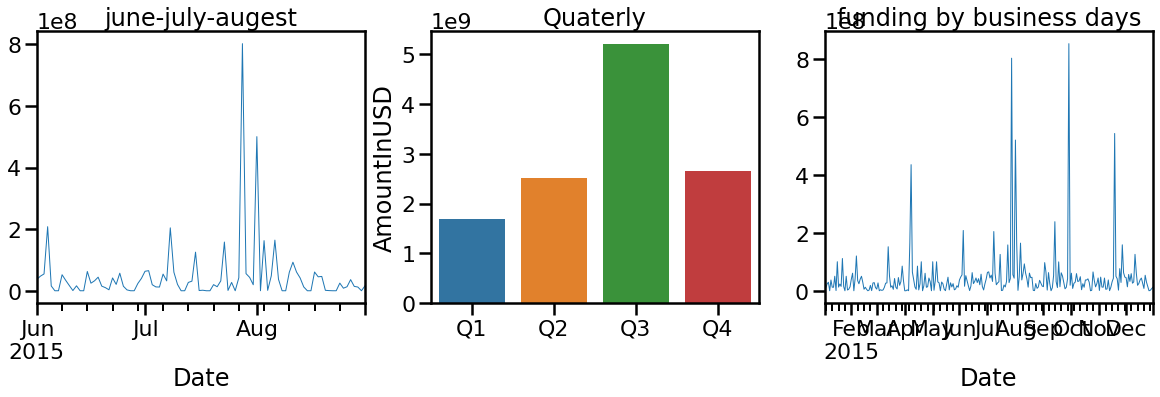

In [71]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(20,6))


a=dnewdf['2015'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2015')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2015-06':'2015-8'].resample('d')['AmountInUSD'].sum().plot(ax=axes[0],lw=1)
a1.set_title('june-july-augest')

a2=sns.barplot(data=dnewdf['2015'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')
a3=dnewdf['2015'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('funding by business days')



plt.show()

###  Insights of 2016

### it seems to be january and  augest was the most funding month in  2016

- A sudden increase is witnessed in the month of july - August

- june seems to be the decline in funding may be  due to goverment administration

- further after september  uniform low funding due to demonetization of indian currency

- early weeeks of augest seems to be the most funding time

- An inverse relation among funding and Quarter 


C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/454675370.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a=dnewdf['2016'].resample('MS').sum()['AmountInUSD'].plot()
C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/454675370.py:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.barplot(data=dnewdf['2016'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/454675370.py:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` 

Text(0.5, 1.0, 'funding by business days')

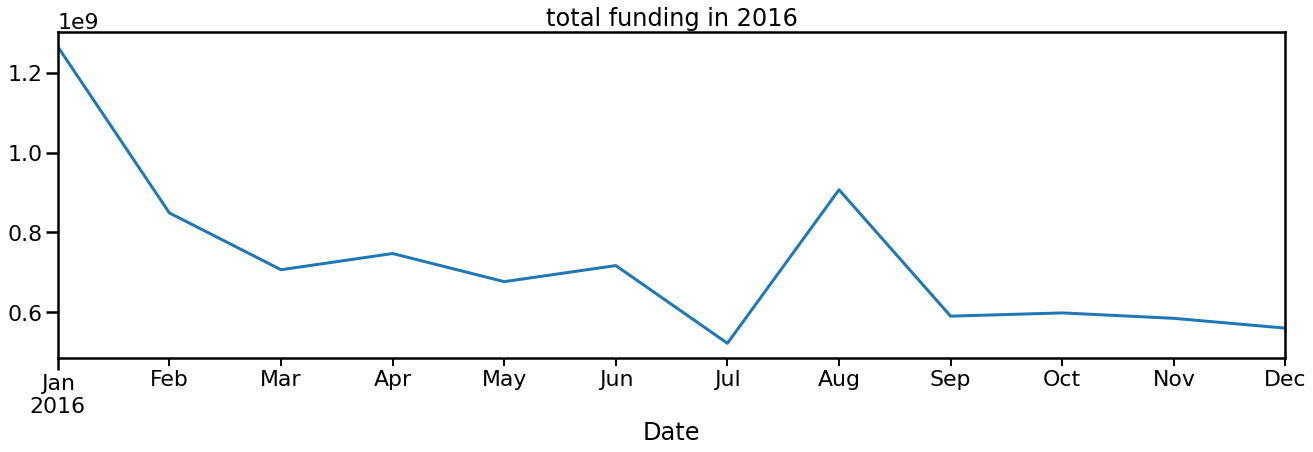

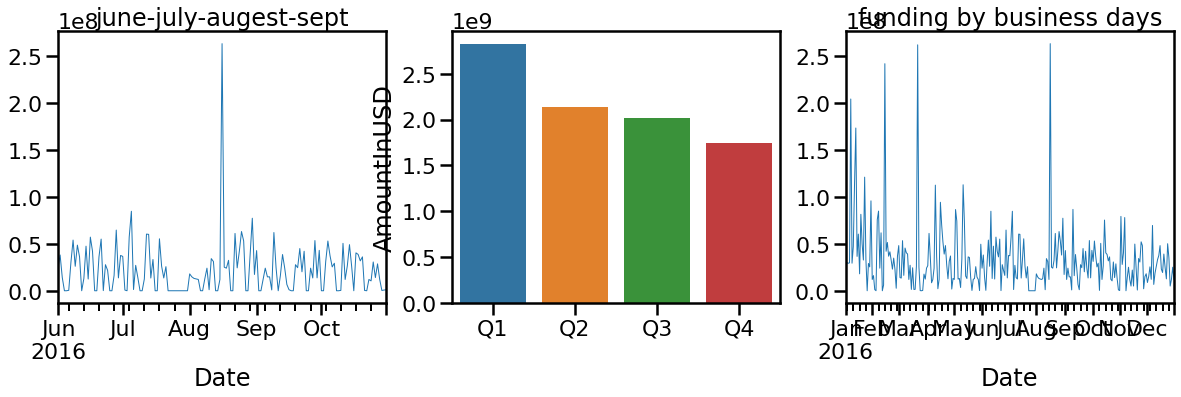

In [72]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(22,6))


a=dnewdf['2016'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2016')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

a1=dnewdf['2016-06':'2016-10'].resample('d')['AmountInUSD'].sum().fillna(method='ffill').plot(ax=axes[0],lw=1)
a1.set_title('june-july-augest-sept')

sns.barplot(data=dnewdf['2016'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])

a3=dnewdf['2016'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('funding by business days')




Insights of 2017
- Month of March and second Week of May had seen peak funding scenarios
- End ofMarch and mid of May witnessed the highest funding
- Quarter 2 has most funding  

C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/1520253794.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a=dnewdf['2017'].resample('MS').sum()['AmountInUSD'].plot()
C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/1520253794.py:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  a1=dnewdf['2017-02':'2017-6'].resample('d')['AmountInUSD'].sum().fillna(method='ffill').plot(ax=axes[0],lw=1)
C:\Users\Hp\AppData\Local\Temp/ipykernel_9676/1520253794.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a2=sns.barplot(data=dnewdf['2017'].resample('Q'

Text(0.5, 1.0, 'funding by business days')

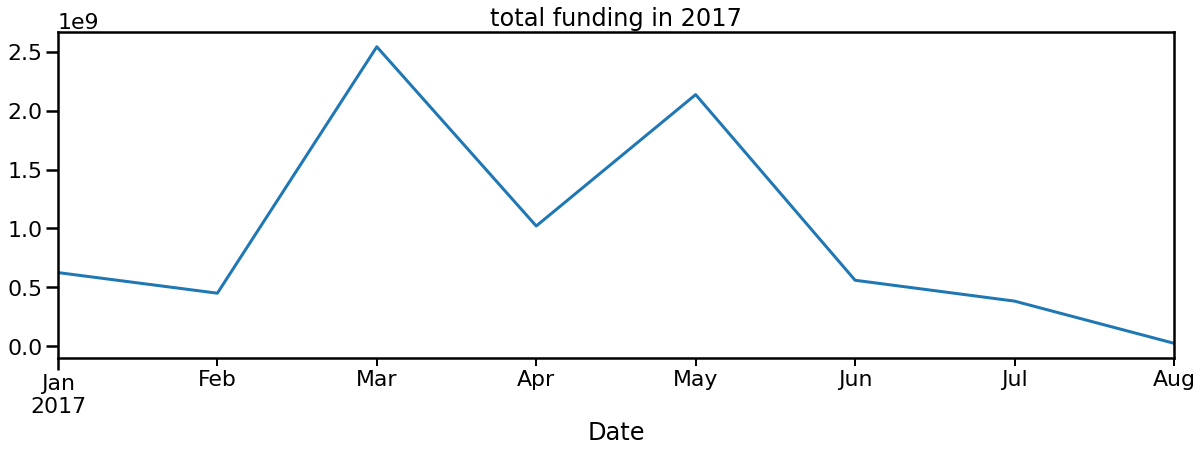

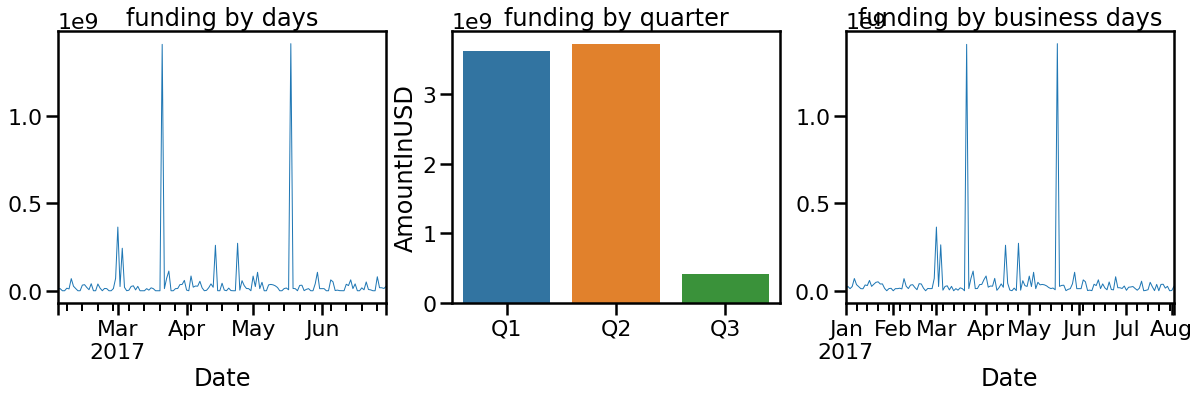

In [73]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(20,6))


a=dnewdf['2017'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2017')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2017-02':'2017-6'].resample('d')['AmountInUSD'].sum().fillna(method='ffill').plot(ax=axes[0],lw=1)
a1.set_title('funding by days')

a2=sns.barplot(data=dnewdf['2017'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3'],ax=axes[1])
a2.set_title('funding by quarter')

a3=dnewdf['2017'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('funding by business days')


###  quartely  amount of investment

-  Quaterly funding is found to be normally distributed
-  Funding is highest in 3rd Quarter of 2015 

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Date
2015-03-31    1.696973e+09
2015-06-30    2.517919e+09
2015-09-30    5.199727e+09
2015-12-31    2.651165e+09
2016-03-31    2.820777e+09
2016-06-30    2.140929e+09
2016-09-30    2.019607e+09
2016-12-31    1.743422e+09
2017-03-31    3.618555e+09
2017-06-30    3.717654e+09
2017-09-30    4.109755e+08
Freq: Q-DEC, Name: AmountInUSD, dtype: float64

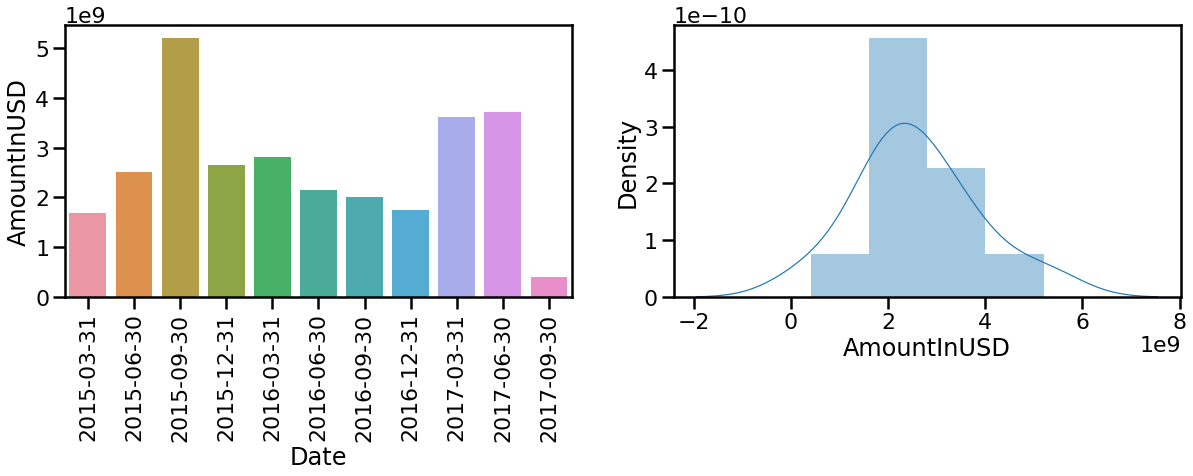

In [77]:
fig,ax=plt.subplots(1,2,figsize=(20,5))

sns.set_context('paper',font_scale=2)
dft=dnewdf.resample('Q').sum()
dft.index=dft.reset_index()['Date'].apply(lambda x: x.date())
a=sns.barplot(data=dft.reset_index(),x='Date',y='AmountInUSD',ax=ax[0])

plt.sca(ax[0])
plt.xticks(rotation=90)
plt.title('')

sns.distplot(dnewdf.resample('Q').sum()['AmountInUSD'],ax=ax[1])
dnewdf.resample('Q').sum()['AmountInUSD'].sort_index()



### Quaterly variation in Funding Amount

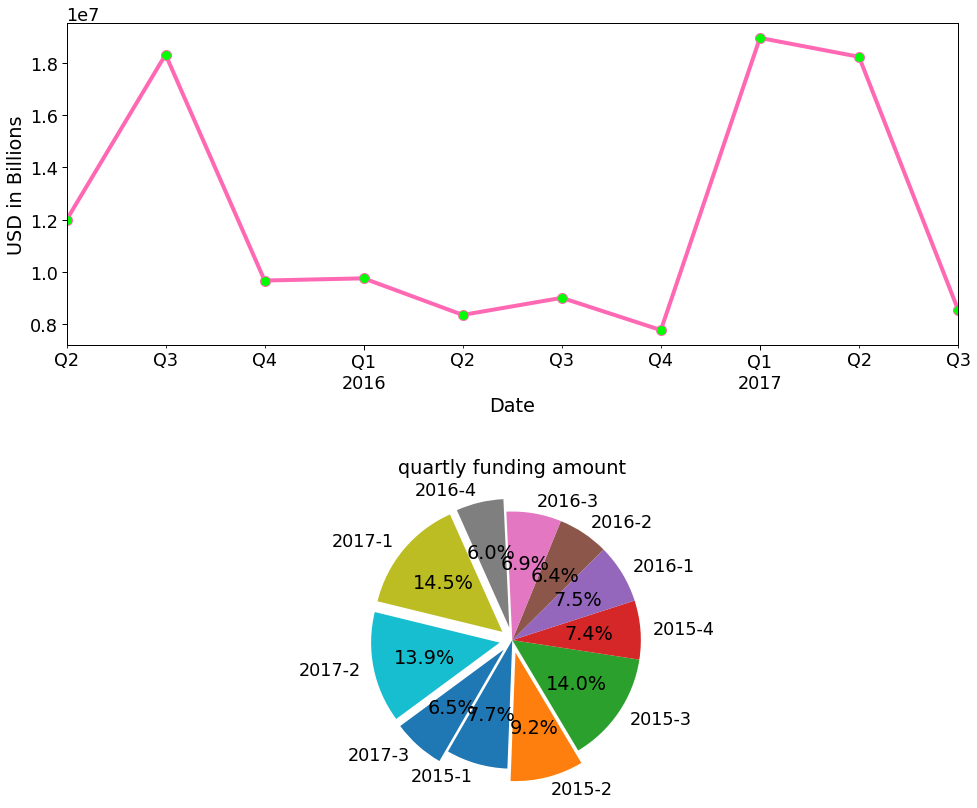

In [78]:

fig,ax=plt.subplots(nrows=2,ncols=1)
fig.set_figheight(13)
fig.set_figwidth(15)
ax[0].set_ylabel('USD in Billions')
quarter=dnewdf['AmountInUSD'].resample('Q').mean().astype('int')
quarter[1:].plot(linewidth=4, color='hotpink', marker="o", markersize=10, markerfacecolor='lime',ax=ax[0])
fig.tight_layout(pad=3) # Or equivalently,  "plt.tight_layout()"
plt.title('quartly funding amount')
explodes = (0,0.1, 0., 0,0,0,0,0.1,0.1,0.1,0.1)
ax[1].pie(quarter[0:],autopct='%1.1f%%',startangle=240,explode=explodes,labels=['2015-1','2015-2','2015-3','2015-4','2016-1','2016-2','2016-3','2016-4','2017-1','2017-2','2017-3'])

plt.show()


In [79]:
quarter

Date
2015-03-31    10101031
2015-06-30    11990090
2015-09-30    18308899
2015-12-31     9675785
2016-03-31     9760472
2016-06-30     8363004
2016-09-30     9016103
2016-12-31     7783135
2017-03-31    18945316
2017-06-30    18223795
2017-09-30     8561988
Freq: Q-DEC, Name: AmountInUSD, dtype: int32

- In 2015 and 2016 the average funding was in the starting and mid quarters
- but in 2017 the average funding changed to mid to last quarters

- the pattern of average funding in 2015 vs 2017 is totally opposite

<AxesSubplot:title={'center':'2017'}, xlabel='AmountInUSD', ylabel='Density'>

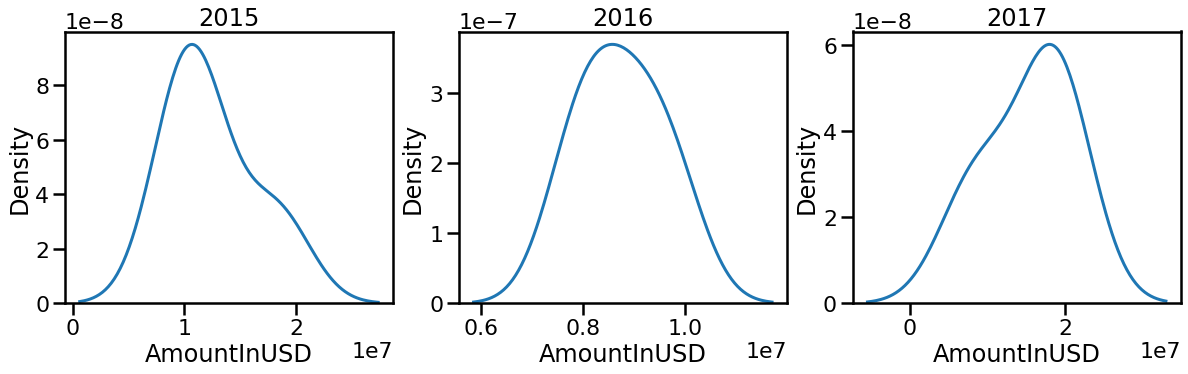

In [74]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

plt.sca(axes[0])
plt.title('2015')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2015'],ax=axes[0])

plt.sca(axes[1])
plt.title('2016')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2016'],ax=axes[1])

plt.sca(axes[2])
plt.title('2017')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2017'],ax=axes[2])


 Private equity is seen to be most favourable Investment Mode for high funding amount per startup

Text(0.5, 1.0, 'InvestmentType Vs AmountInUSD')

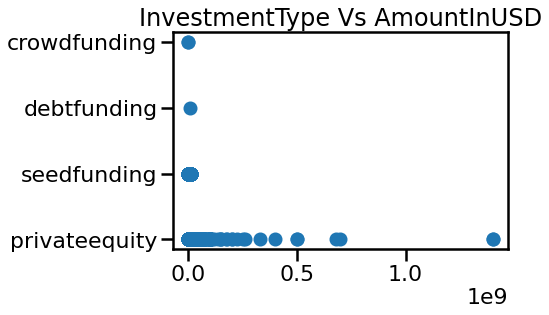

In [75]:
plt.scatter(x=newdf['AmountInUSD'],y=newdf['InvestmentType'])
plt.title('InvestmentType Vs AmountInUSD')

### Investment type in 2015



- private equity is more dispersed according to amount funded  
 and more amount is invested through private equity per startup on the otherhand
 seed funding is less dispersed according to amount funded and low amount is funded using this but 
 frequency of seed funding is more as compared to private equity
- No dept funding occured in 2015

In [305]:
plt.figure(figsize=(15,8))
d2015=dnewdf['2015']
print(sns.stripplot(data=d2015,x='InvestmentType',y='AmountInUSD',jitter=True,hue='numberofinvestors'))

print(d2015['InvestmentType'].value_counts())
d2015[d2015['InvestmentType']=='privateequity'].sort_values(by='AmountInUSD',ascending=False).head(5)

- private equity is more dispersed according to amount funded
 and more amount is invested through private equity per startup on the otherhand seed funding is less dispersed         according to amount funded and low amount is funded using this but frequency of seed funding is more as compared 
 to private equity
- As compared to 2015v seed funding has slightly more deviated 
- No dept funding and crowd funding occured in 2016

- snapdeal and makemytrip was funded most via private equity 

In [306]:
plt.figure(figsize=(15,8))
d2016=dnewdf['2016']
print(sns.stripplot(data=d2016,x='InvestmentType',y='AmountInUSD',jitter=True,hue='numberofinvestors'))

print(d2016['InvestmentType'].value_counts())
d2016[d2016['InvestmentType']=='privateequity'].sort_values(by='AmountInUSD',ascending=False).head(2)

### InvestmentType In 2017
- Private Equity is not so dispersed as compared to previous two years
- Debt funding slightly taken place

flipkart and paytm had max funding at once  and uncommon to others

In [307]:
plt.figure(figsize=(15,8))
d2017=dnewdf['2017']
print(sns.stripplot(data=d2017,x='InvestmentType',y='AmountInUSD',jitter=True,hue='numberofinvestors'))

print(d2017['InvestmentType'].value_counts())
d2017[d2017['InvestmentType']=='privateequity'].sort_values(by='AmountInUSD',ascending=False).head(2)

## startups with funding on multiple days
- Startups having 2 number of Investors are higher


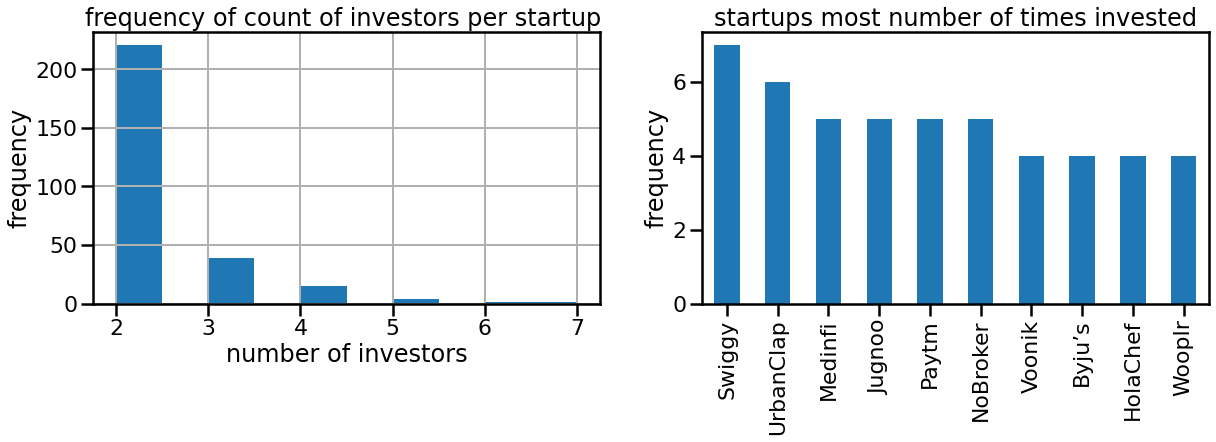

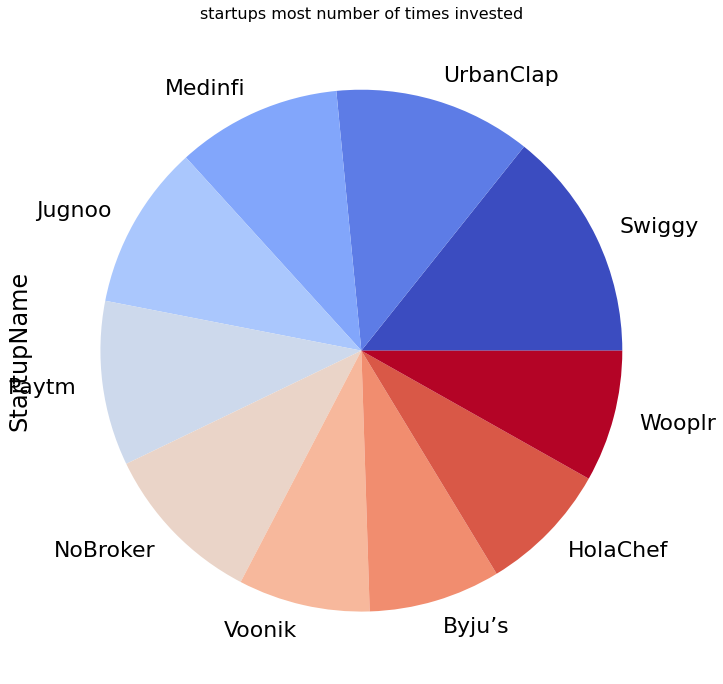

In [76]:
fig,ax=plt.subplots(nrows=1,ncols=2)
fig.set_figheight(5)
fig.set_figwidth(20)

df_v=dnewdf['StartupName'].value_counts()
df_v[df_v>1].hist(ax=ax[0])
df_v[df_v>1].head(10)
ax[0].set_title('frequency of count of investors per startup ')
ax[0].set_ylabel('frequency')
ax[0].set_xlabel('number of investors')
ax[1].set_title('startups most number of times invested')
ax[1].set_ylabel('frequency')

newdf['StartupName'].value_counts().head(10).plot(kind='bar')

plt.figure(figsize=(15,12))
newdf['StartupName'].value_counts().head(10).plot(kind='pie',colormap='coolwarm')
plt.title("startups most number of times invested", fontsize=16)
plt.show()

##  CONCLUSION


1.funding startups are highly dispersed as investors are highly specific about choosing startups <br>
2.there were more than 2000 new startups funded in the year between 2015-2017<br>
3.Paytm and flipkart were funded most <br>
4.top 10 investments are made through private equity<br>
5.consumer internet sector got most ammount of funding and attracted the most investors<br>
6.Banglore had the most average funding <br>
7.Ahmedabad seems to be an anomalie as it only witnessed the debt funding<br>
8.Maximum Total  funding was generated  in the  year 2015 and then it slowly decreased with increase in years **Because indian economy started slowing down.**<br>
11.In 2015 the period of june-oct was funded most and quarter 3 was funded most<br>
12.In 2016 period of june and september were most funded and quterly funding decreased with increase in time<br>
13.In 2017 the period between march- may had recieved most fundings<br>
14.3rd quarter  of 2015 was invested most and funding amount was normally distributed<br>
15.starting months of 2015,mid of 2016 and 3rd Quarter of 2017 were funded most as per individual investment<br>
16.2016 had highest amount of investments<br>
17.In 2015 there was slight fund generated through crowd funding<br>
18.In 2016 there was slight variation in seed funding by amount in the end bcause of **Demonetization**<br>
19.In 2017 there dept funding witnessed for first time but in less fraction<br>
 